<center> <h1> Teoria de Juegos </h1> </center>
<center> <h4> 1er Exámen Parcial (Parte de programación en Python con libreria Mesa) </h4> </center>

<center> <h3> Profesores: Matías Alvarado, Sergio Alcalá, Departamento de Computación, CINVES
 </h3> </center>
 

<center> <h3>  Moises Omar León PIenda </h3> </center>
 



Sean  conjuntosde  agentes que  interactúanen  un  entorno  definido, circular o  poligonal,conforme el Modelo de Ising en 2 dimensiones:



  1.Programar el modelo de Ising, con spines (agentes)tales que: (1 puntos)

    a.Los   conjuntos A1   y   A2 de   cardinalidad n y m,cooperan entre   sí, respectivamente. 
    b.A1 y A2 compiten entre sí, conforme el modelo de Ising. 
    c.Entradas de cada conjunto dadaporfunción de distribución uniforme.
    d.Hay factores externos μ1  y + μ2 cuyos  eventos  ocurren conforme  una distribución normal.

  2.Con entradas  dadas  por  unadistribución normal  de  probabilidades.Interpretar tal que:(2.5puntos)
  
    a.A1 es cáncer, C.
    b.A2 es sistema inmune, SI.
    c.El factor μ 1es favorable adesarrollo de C, y un μ2 favorableal SI.
    
  3.Simulaciones:definir y diseñar 3 escenarios:(2.5puntos)
  
    a.A1 + μ1 gana o escapa a A2+μ2.
    b.A1 + μ1 y A2 + μ2 están en equilibrio.
    c.A2+ μ2 gana o elimina a A1 + μ1

### Primero importamos las librerias que no se encuentran en colab

Para importar una biblioteca que no está en Colaboratory de forma predeterminada, puede utilizar

`!pip install` or `!apt-get install`.

In [ ]:
#Matplotlib
!pip install matplotlib-venn

#Mesa
!pip install mesa

!apt-get -qq install -y libfluidsynth1



1.Programar el modelo de Ising, con spines (agentes)tales que: (1 puntos)

    a.Los   conjuntos A1   y   A2 de   cardinalidad n y m,cooperan entre   sí, respectivamente. 
    b.A1 y A2 compiten entre sí, conforme el modelo de Ising. 
    c.Entradas de cada conjunto dada por función de distribución uniforme.
    d.Hay factores externos μ1  y + μ2 cuyos  eventos  ocurren conforme  una distribución normal.




El modelo de Ising es un modelo matemático simple que permite estudiar un sistema de spines (o dipolos magneticos) interactuantes. El modelo en 2 dimensiones da cuenta de un cambio de fase a baja temperatura, en la cual el sistema se magnetiza. El Hamiltoniano que describe el sistema es 

 H = - ∑<sub>ij</sub>J<sub>ij</sub>S<sub>i</sub>S<sub>j - </sub>μ ∑<sub>j </sub>h <sub> j </sub> S <sub> j


La interacción spin-spin se clasifica de la siguiente manera:

-J<sub>ij</sub> >0: ferromagnética

-J<sub>ij</sub> <0: antiferromagnética

-J<sub>ij </sub> =0: no interactuante 


La versión más simple del modelo de Ising considera interacción únicamente a primeros vecinos, sin la presencia den un campo magnético externo. El Hamiltoniano en este caso es

H = -J ∑<sub>ij </sub>S<sub>i</sub>S<sub>j

donde J=J<sub>ij </sub> toma el mismo valor para todos los pares de spines.     
 


In [ ]:
from pylab import *

fig = figure(1)
ax = subplot(111)

# Jij = J for all i,j:  Coupling constant (Jij>0: ferromagnetic, Jij<0: antiferromagnetic, Jij=0: non magnetic )
J= 1                   # In eV, ferromagnetic
kT = 1.2*J             # In eV

# ONSAGER SOLUTION FOR 2D LATTICE: kT = 2*J/(ln(1+sqrt(2))) = 2.2691853

n=61
mat = random(size=(n,n))   # Matrix of randoms in the interval  [ 0.0 1.0 ]
mat = 2*floor(2*mat)-1     # Martrix of random 1's and -1's

img = imshow(mat)
show(block=False)

nBlocks = 100
for iBlock in xrange(nBlocks):

 for ix in xrange(n):
  ixp = (ix+1) % n      # Neighbor to the right
  ixm = (ix-1) % n      # Neighbor to the left
  for iy in xrange(n):
   iyp = (iy+1) % n     # Neighbor above
   iym = (iy-1) % n     # Neighbor below
   s = mat[ixm,iy] + mat[ixp,iy] + mat[ix,iyp] +  mat[ix,iym]  # Sum of neighbors spins
   mOld = mat[ix,iy]   # Old value of the spin
   EOld = -J*mOld*s     # Si * (S_above + S_below + S_left + S_right)
   mNew = -mOld
   ENew = -J*mNew*s     # sum_ij  Si'*Sj, where Si' = -Si
   Ediff = ENew - EOld     # No need to sum over all the lattice, just this  (ix,iy)  site energy.

   prob = exp(-Ediff/kT)
   if ENew < EOld:
    mat[ix,iy] = mNew
   else:
    mat[ix,iy] = mNew if random() < exp(-Ediff/kT) else mOld

 #print iBlock
 img.set_data(mat)
 plt.pause(1e-30)
 draw()

 #savefig('is'+str(iBlock)+'.png')

Importar librerias

In [ ]:
import numpy
from collections import defaultdict
from matplotlib import pyplot
import itertools
%matplotlib inline

Definición de constantes

    length es la longitud de nuestro sistema.
    J es la constante de intercambio.
    kB es la constante de Boltzmann.


In [ ]:
length = 10
J = 1.0
kB = 1.0

     

Creación de arreglos


    -sites es el arreglo donde se almacenarán las parejas (i,j)(i, j)(i,j) de los elementos de la red.
    -spins es un diccionario donde las keys son las parejas (i,j)(i, j)(i,j) y los values son el respectivo valor para el espín.
    -nbhs es un defaultdict(list), es decir, los values por defecto serán listas vacías. En este diccionario las keys son las parejas (i,j)(i, j)(i,j) y los values son una lista de tuplas, donde cada pareja corresponde a un vecino.


In [ ]:
sites = list()
spins = dict()
nbhs = defaultdict(list)


Creación de la muestra

Debemos crear la red cuadrada de lado length y agregar a la lista sites las parejas (i,j)(i, j)(i,j) como tuplas. Se puede observar que sites es una lista donde cada elemento es una tupla que corresponde a un sitio:

In [ ]:
print(sites)

[]


Creación de estado aleatorio

La función random_configuration recorre todos los sitios y les asigna un valor de 1 o -1 aleatoriamente. Se empleará para darle el estado inicial al sistema a temperatura alta.

Si se ejecuta la función random_configuration, el diccionario spins tomará valores de -1 o 1 para cada key:

In [ ]:
def random_configuration():
    for spin in sites:
        spins[spin] = numpy.random.choice([-1, 1])

Función para visualización de los espines

La función consiste en recorrer cada pareja (i,j)(i, j)(i,j) y en cada punto colocar una flecha de color rojo si el sitio tiene valor 1 o azul si tiene valor -1. Se ejecuta la función plot_spins para visualizar el estado del sistema:

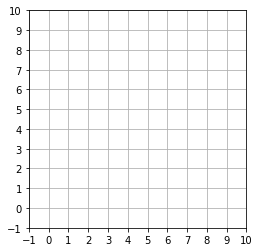

In [ ]:
def plot_spins():
    pyplot.figure()
    colors = {1: "red", -1: "blue"}
    for site, spin in spins.items():
        x, y = site
        pyplot.quiver(x, y, 0, spin, pivot="middle", color=colors[spin])
    pyplot.xticks(range(-1,length+1))
    pyplot.yticks(range(-1,length+1))
    pyplot.gca().set_aspect("equal")
    pyplot.grid()
    pyplot.show

plot_spins()    

##Codigo completo


In [ ]:


class ising_Agent(Agent):
    ## Individual agent represented by a node in a network

    ## Initializing the agent.
    def __init__(self, unique_id, model,agent_type):
        super().__init__(unique_id, model)
        self.unique_id = unique_id
        self.type = agent_type
        
    
    ## No content on agent's step.
    def step(self):
      #Hamintoniano
      energia_inicial = 0            
      energia_final = 0     # Energía si se voltea el spin
      spin = self.type
      spin_f = - spin
      if self.model.normal: 
          # Selecciona si es una distribución normal o uniforme
          u1 = np.random.normal(self.model.media1, self.model.desviacion1)
          u2 = np.random.normal(self.model.media2, self.model.desviacion2)
      else:
          u1 = random.random()
          u2 = random.random()

      for neighbor in self.model.grid.neighbor_iter(self.pos, False): # Alineación Von Neuman
          ng = neighbor.type
          if ng ==1: # si es positivo o cancerosa se una mu_1
              energia_inicial += -spin*ng*u1
              energia_final += -spin_f*ng*u1
          else:       # si es -1 SI se una mu_2
              energia_inicial += -spin*ng*u2
              energia_final += -spin_f*ng*u2

      energia_inicial = -self.model.J*energia_inicial # Cálculo de las energías
      energia_final = -self.model.J*energia_final 
      Temp = self.model.T_inv
      r1 = random.random()

      diff_E = energia_final - energia_inicial # Diferencia de Energias
      boltzman = np.exp(-diff_E*Temp)
      # Si la energía es menor al hacer el flip entonces se elige ese estado
      if (diff_E <0 and self.model.J !=0):
          spin *= -1
          self.model.total_energy +=diff_E
      elif( r1 < boltzman and self.model.J!=0):
      # Probabilidad que cambie espontaneamente.
          spin *= -1
          self.model.total_energy +=diff_E
      self.type = spin

    
class ising_model(Model):
    #Model containing N agents connected in a network. Also change the value of agent here
    
    ##Initializing the model.
    def __init__(self, height=20, width=20, minority_pc=0.5, T=0.4, J=0.0, normal=False, 
    media1 = 0.5, desviacion1=1, media2 = 0.5, desviacion2=1):
        """ """
        #model atributtes
        self.height = height
        self.width = width
        self.minority_pc = minority_pc       
        self.T_inv = 1/T
        self.total_energy =0
        self.J =J
        self.normal=normal
        self.media1 = media1
        self.desviacion1= desviacion1
        self.media2 = media2
        self.desviacion2= desviacion2

        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(width, height, torus=True)

        self.datacollector = DataCollector(
            {"energy": "energy"}, 
            {"x": lambda a: a.unique_id[0], "y": lambda a: a.unique_id[1]},
        )
        
        ## Creating the agents.
        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            if self.random.random() < self.minority_pc:
                agent_type = 1              # células cancerosas
            else:
                agent_type = -1             # Sistema inmune

            agent = IsingAgent((x, y), self, agent_type)
            self.grid.unique_idition_agent(agent, (x, y))
            self.schedule.add(agent)
        for cell in self.grid.coord_iter():
            # Energía total
            spin = cell[0].type
            x = cell[1]
            y = cell[2]
            energia_inicial =0
            for neighbor in self.grid.neighbor_iter((x,y), False): 
                energia_inicial += neighbor.type
            self.total_energy += -energia_inicial*spin/2


        ## Creating collector for difference function defined above.
        self.running = True
        self.datacollector.collect(self)
    
    ## At each model step, they collect data by using the collector.
    def step(self):
        self.schedule.step()
        # collect data
        self.datacollector.collect(self)

In [ ]:


from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.modules import CanvasGrid, ChartModule, TextElement
from mesa.visualization.UserParam import UserSettableParameter



class Element(TextElement):
#Display a text count of how many happy agents there are.
    
    def __init__(self):
        pass

    def render(self, model):
        return "Energy agents: " + str(model.total_energy )


def schelling_draw(agent):
    """
    Portrayal Method for canvas
    """
    if agent is None:
        return
    portrayal = {"Shape": "rect", "w":1, "h": 1, "Filled": "true", "Layer": 0}

    if agent.type == 1:
        portrayal["Color"] = ["#FF0000", "#FF9999"]
        portrayal["stroke_color"] = "#00FF00"
    else:
        portrayal["Color"] = ["#0000FF", "#9999FF"]
        portrayal["stroke_color"] = "#000000"
    return portrayal

energy_element = Element()

height = 50
width = 50 
canvas_element = CanvasGrid(schelling_draw, height, width, 500, 500)
e_chart = ChartModule([{"Label": "total_energy", "Color": "Black"}])

model_params = {
    "height": height,
    "width": width,
    "minority_pc": UserSettableParameter("slider", "Porcentaje de azules", 0.5, 0.01, 1.0, 0.005),
    "T": UserSettableParameter("slider", "T (temperatura)", 0.4, 0.0, 5, 0.1),
    "J": UserSettableParameter("slider", "J", -0.5, -2, 2, 0.01),
    "normal": UserSettableParameter("checkbox", "Distribución normal de mu1 y mu2", value=False),
    "media1": UserSettableParameter("number", "Media mu1", value=0.5),
    "desviacion1": UserSettableParameter("number", "Desviación estandar mu1", value=0.5),
    "media2": UserSettableParameter("number", "Media mu2", value=0.5),
    "desviacion2": UserSettableParameter("number", "Desviación estandar m2", value=0.5),

}

